<a href="https://colab.research.google.com/github/remanx2558/MIDBReviews/blob/master/ELMO_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approach -02

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/My Drive/malia"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train.txt', 'test.csv', 'train.csv', 'yelp_reviews_updated.txt', 'yelp_reviews_train.txt', 'yelp_reviews_test.txt', 'yelp_reviews_train_clean.txt', 'yelp_reviews_test_clean.txt', 'wiki-news-300d-1M.vec', 'wiki-news-300d-1M.vec.zip (Unzipped Files)', 'wiki-news-300d-1M.vec.zip']


In [0]:
data = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")

In [6]:
import pandas as pd
import numpy as np


from nltk.corpus import stopwords
import string
 
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence



import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


reviews = []
sentences = list(movie_reviews['text'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

movie_reviews['text'] =reviews    

In [9]:
movie_reviews = pd.read_csv(r"/content/drive/My Drive/malia/train.csv")

movie_reviews.isnull().values.any()
movie_reviews.sentiment= movie_reviews.sentiment.fillna(0.0).astype(int)#this will conver float into int and also manage missing values

movie_reviews.shape

(25005, 2)

In [0]:
data = movie_reviews

In [11]:
#M class has way less data than the orthers, thus the classes are unbalanced.
data.sentiment.value_counts()

0    12505
1    12500
Name: sentiment, dtype: int64

In [0]:
#I do aspire here to have balanced classes
num_of_categories = 12000
shuffled = data.reindex(np.random.permutation(data.index))
n = shuffled[shuffled['sentiment'] == 0][:num_of_categories]
p = shuffled[shuffled['sentiment'] == 1][:num_of_categories]
concated = pd.concat([n,p], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0


In [14]:
shuffled.dtypes

text         object
sentiment     int64
dtype: object

In [15]:
data.sentiment.value_counts()

0    12505
1    12500
Name: sentiment, dtype: int64

In [16]:
shuffled.head()

,text,sentiment
14306,I hate this movie. I hate the show. i hate jus...,1
22985,I went into this movie hoping for the best. I ...,1
18302,"In addition to his ""Tarzan"" series, the prolif...",1
3992,A sophisticated contemporary fable about the s...,0
7055,"Anna (Charlotte Burke), who is just on the ver...",0


In [17]:
#One-hot encode the lab
concated.loc[concated['sentiment'] == 0, 'LABEL'] = 0
concated.loc[concated['sentiment'] == 1, 'LABEL'] = 1
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=2)
print(labels[:10])
if 'sentiment' in concated.keys():
    concated.drop(['sentiment'], axis=1)
'''
 [1. 0. 0. 0.] e
 [0. 1. 0. 0.] b
 [0. 0. 1. 0.] t
 [0. 0. 0. 1.] m
'''

20785    1
18527    1
709      0
11434    0
13630    1
8575     0
11598    0
3752     0
5160     0
1027     0
Name: LABEL, dtype: int64
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


'\n [1. 0. 0. 0.] e\n [0. 1. 0. 0.] b\n [0. 0. 1. 0.] t\n [0. 0. 0. 1.] m\n'

In [18]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['text'].values)
sequences = tokenizer.texts_to_sequences(concated['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 86997 unique tokens.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

In [22]:
epochs = 5
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])


((18000, 130), (18000, 2), (6000, 130), (6000, 2))
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 130, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 1,073,538
Trainable params: 1,073,538
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14400 samples, validate on 3600 samples
Epoch 1/5
14400/14400 [==============================] - 23s 2ms/step - loss: 0.6899 - acc: 0.5386 - val_loss: 0.6800 - val_acc: 0.6531
Epoch 2/5
14400/14400 [==============================] - 23s 2ms/step - loss: 0.6573 - acc: 0.6240 - val_loss: 0.5968 - val_acc: 0.7175
Epoch 3/5
14400/14400 [==============================] - 23s 2ms/step - loss: 0.5743 - acc: 0.7039 - val_loss: 0.5125 - val_acc: 0.7506
Epoch 4/5
14400/14400 [==============================] - 22s 2ms/step - loss: 0.5212 - acc: 0.7462 - val_loss: 0.4762 - val_acc: 0.7728
Epoch 5/5
14400/14400 [==============================] - 23s 2ms/step - loss: 0.4912 - acc: 0.7685 - val_loss: 0.4663 - val_acc: 0.7775


In [24]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

6000/6000 [==============================] - 5s 841us/step
Test set
  Loss: 0.471
  Accuracy: 0.771


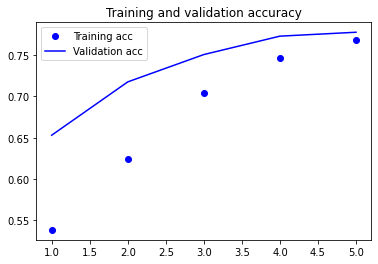

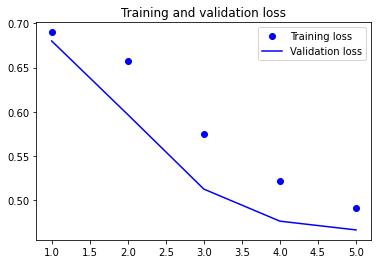

In [25]:


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [26]:
txt = ["Regular fast food eating linked to fertility issues in women"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

[[0.58809334 0.4119067 ]] entertainment
